# Python Assignment 2

### Prof. S. Amini

### Mathematical Methods In Engineering - 1401-01

### Deadline: ?

___

### Householder Transformation
In this assignment we become familiar with QR factorization, The algorithm we want to use for the first question is the "householder transformation".
As you learned in the previous assignment, we can use the Gauss's transformation to eliminate the elements below matrix pivots. Householder transformation can be used like that, but with a partially different approach.

let <b>v</b> be an arbitrary vector and $$v\neq0$$ we call P the householder matrix if:$$P = I-\beta vv^T  ,     
 \beta=\frac{2}{v^Tv}$$
___ 

1. prove that HH matrix is an orthogonal matrix.


2. if $\textbf{Q}\textbf{Q}{^T}={I}$ show that:$$||Q \textbf x ||=||\textbf x ||$$
____
note:


if we have $\textbf P\textbf s=\textbf t$ which ||<b>s</b>||=||<b>t</b>|| and <b>s</b>$\neq$<b>t</b> we can choose:

$$\textbf{v}=\textbf{t}-\textbf{x}$$
___

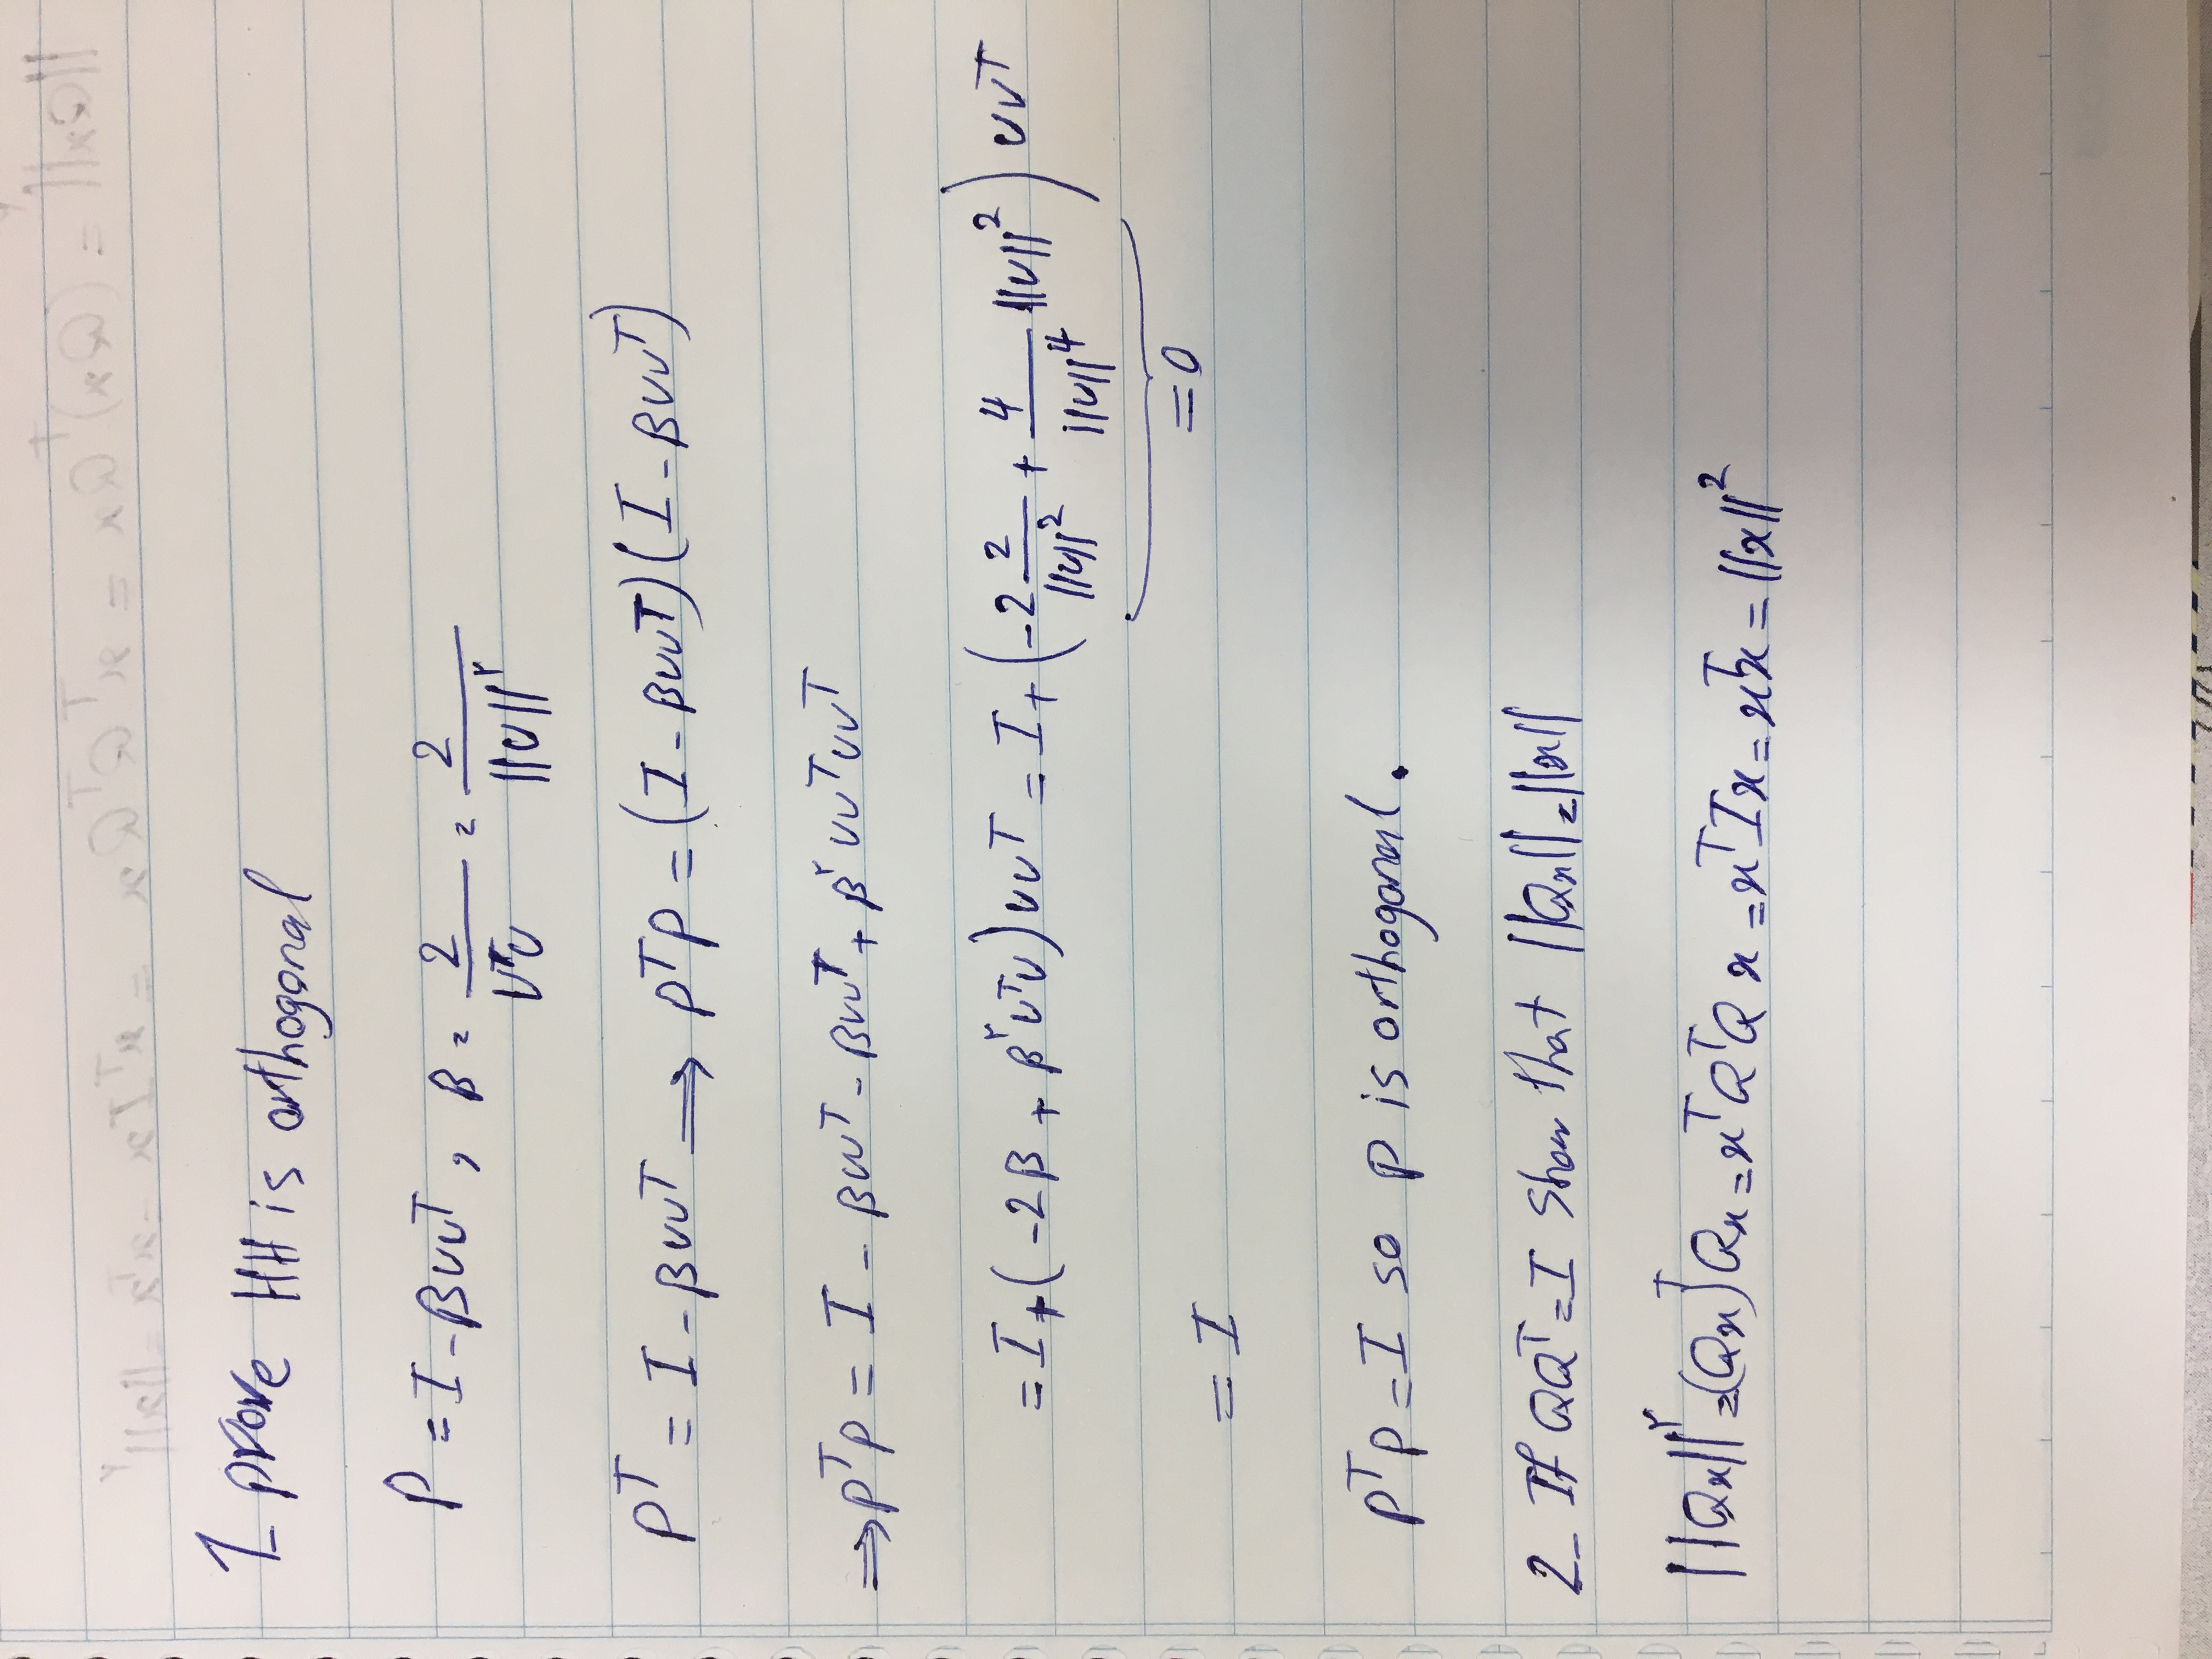

### 1. QR factorization

$\textbf {Definition}$ All $\textbf{A}_{m\times n}$ matrix have QR factorization where Q is an orthonormal matrix and R is an upper triangular matrix.$$A=QR$$

Using the HH matrix, complete the code cells below to create an algorithm for finding QR factorization of matrix A.

In [132]:
# import numpy package
import numpy as np

In [137]:
def my_QR(A):
    m,n=A.shape
    if m==n:
        Q=np.eye(m)
        for i in range(n-(m==n)):
            H=np.eye(m)
            H[i:,i:]=make_HH(A[i:, i])
            Q=Q@H
            A=H@A
        R=A.copy().round(3)
        Q=Q.round(3) 
        
    elif m>n:
        q=np.eye(m)
        for i in range(n):
            H=np.eye(m)
            H[i:,i:]=make_HH(A[i:, i])
            q=q@H
            A=H@A
        Q=q[:,0:n]
        R=A[0:n,0:n]
        R=R.round(3)
        Q=Q.round(3)
        
    elif m<n:
        q=np.eye(m)
        for i in range(m-1):
            H=np.eye(m)
            H[i:,i:]=make_HH(A[i:, i])
            q=q@H
            A=H@A
        
        R=A.copy().round(3)
        Q=q.round(3)


    return Q,R

def make_HH(a):
    u=a/(a[0] + np.copysign(np.linalg.norm(a),a[0]))
    u[0]=1
    H=np.eye(a.shape[0])
    H-=(2/np.dot(u, u))*u[:, None]@u[None, :]
    return H

In [138]:
# time and correctness test
numpy_test = {'upper-triangular and  orthogonal test error':0.0, 'correctness test error':0.0}
yours_test = {'upper-triangular and  orthogonal test error':0.0, 'correctness test error':0.0}

num_test = 50
for i in range(num_test):
    m, n = np.random.randint(40, 50), np.random.randint(40, 50)
    A = np.random.randn(m,n)

    # numpy code
    Q, R = np.linalg.qr(A.copy(), mode='complete')
    numpy_test['upper-triangular and  orthogonal test error'] += np.linalg.norm(np.tril(R,-1)) + np.linalg.norm(np.eye(m) - Q @ Q.T)
    numpy_test['correctness test error'] += np.linalg.norm(A - Q @ R)

     ### To Do ###
    
    my_Q, my_R = my_QR(A.copy())
    yours_test['upper-triangular and  orthogonal test error'] += np.linalg.norm(np.tril(my_R,-1)) + np.linalg.norm(np.eye(m) - my_Q @ my_Q.T)
    yours_test['correctness test error'] += np.linalg.norm(A - my_Q @ my_R)

for name in numpy_test:
    numpy_test[name] /= num_test
    yours_test[name] /= num_test

yours_check = {'upper-triangular and  orthogonal test error': yours_test['upper-triangular and  orthogonal test error'] <= 1e-5, 
               'correctness test error': yours_test['correctness test error'] <= 1e-5}

print(f'numpy| test ---> {numpy_test}')
print(f'yours| test ---> {yours_test}')
print(f'yours| check ---> {yours_check}')

numpy| test ---> {'upper-triangular and  orthogonal test error': 4.350159760823931e-15, 'correctness test error': 2.3877521532186784e-14}
yours| test ---> {'upper-triangular and  orthogonal test error': 0.8196517859401236, 'correctness test error': 0.08670860999405117}
yours| check ---> {'upper-triangular and  orthogonal test error': False, 'correctness test error': False}


### Least Squares
As you learned in the course, the least squares method is a way of estimating a function given sample points $$(x_i, y_i), \quad  0 \leq i \leq n$$ with the assumption of linearity of the underlying function.
1. Create n=10 sample points $(x_i, y_i)$ where $$y_i = 2x_i + 3 + \epsilon_i$$ $\epsilon_i$ is an error term (measurement error etc.) added to $y_i$ and is modeled by random variables: $\epsilon_i \stackrel{iid}{\sim} \mathcal{N}(0, 1) $  . The x's should range from 0 to 5 and be evenly spaced (hint: use numpy's linspace function)

2. Given the samples of the previous part, try to estimate a linear function that models the relationship between $x_i$'s and $y_i$'s using the least squares method (find a and b such that the error function $\sum_{i=0}^{n-1} ||ax_i + b - y_i||^2$ is minimized)

3. Plot the sample points and the line you estimated in the previous part in the same graph using matplotlib.

4. Plot the error function $\sum_{i=0}^{n-1} ||ax_i + b - y_i||^2$ as a function of n where $10\leq n \leq 50$ and a and b are the least squares estimates of the line $ax + b = y$.

5. Repeat part 1 but this time create n=20 sample points with a quadratic term added to y: $$y_i = x^2_i + 2x_i + 3 + \epsilon_i$$ $\epsilon_i$ has the same distribution as before and x's range from 0 to 5 likewise.

6. Try to use the least squares method to estimate the coefficients of the quadratic function given the sample points of part 5 (hint: in the least squares method we minimze the norm of the error vector $||Ax-y||^2$. Add a column to matrix A for the quadratic terms and then try to minimize the error function using the least squares method).

7. Repeat part 3 for the estimated quadratic function of the previous part.

In [139]:
import numpy as np
import matplotlib.pyplot as plt

# Part1

In [140]:
x_i=np.linspace(0,5,10).round(2)
eps_i=np.random.normal(0,1,10).round(2)
y_i=2*x_i+3+eps_i

[0.   0.56 1.11 1.67 2.22 2.78 3.33 3.89 4.44 5.  ]
[ 2.9   4.78  4.96  6.75  5.76  7.38  9.73 11.66 14.39 12.06]


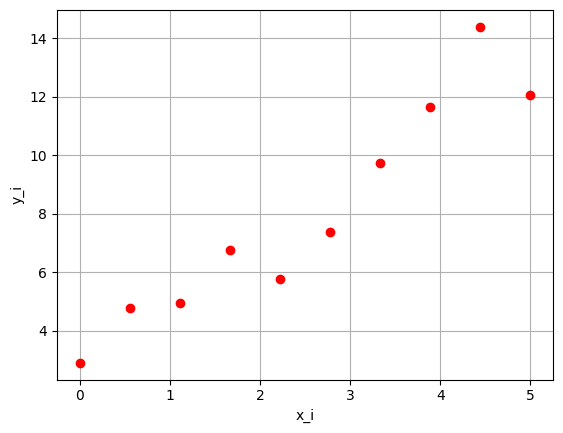

In [141]:
plt.plot(x_i,y_i,'ro')
plt.grid()
plt.xlabel('x_i')
plt.ylabel('y_i')
print(x_i)
print(y_i)

# Part2

In [142]:
W=np.array([1]*10).reshape(10,1)
A=np.concatenate([W,x_i.reshape(10,1)],axis=1)
B=(y_i.copy().T).reshape(10,1)
X_ls=(np.linalg.inv(A.T@A)@(A.T)@B).round(3)
a,b=X_ls

# Part3

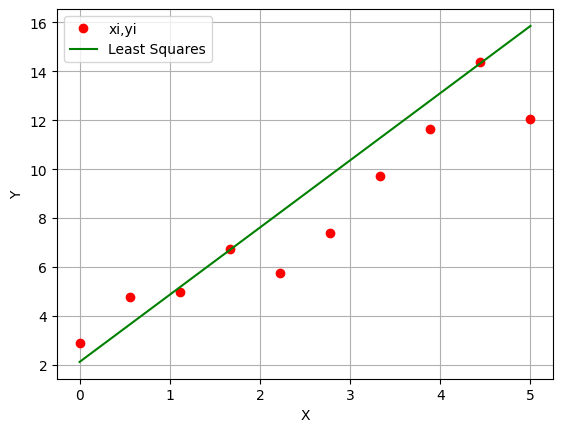

In [143]:
plt.plot(x_i,y_i,'ro')
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x_i,a*x_i+b,color='green')
plt.legend(['xi,yi','Least Squares'])
# print('x_i=',x_i)
# print('y_i=',y_i)
# print('y_ls=',a*x_i+b)
# print(a,b)

# Part4

In [144]:
# error func
norm2_er=[]
x_j=[]
for j in range(10,51):
    x_j.append(j)
    x_i=np.linspace(0,5,j).round(2)
    eps_i=np.random.normal(0,1,j).round(2)
    y_i=2*x_i+3+eps_i
    
    W=np.array([1]*j).reshape(j,1)
    A=np.concatenate([W,x_i.reshape(j,1)],axis=1)
    B=(y_i.copy().T).reshape(j,1)
    X_ls=(np.linalg.inv(A.T@A)@(A.T)@B).round(3)
    a,b=X_ls
    
    er=y_i-a*x_i+b
    norm2_er.append(((np.linalg.norm(er))**2).round(2))

Text(0.5, 1.0, 'Error Function')

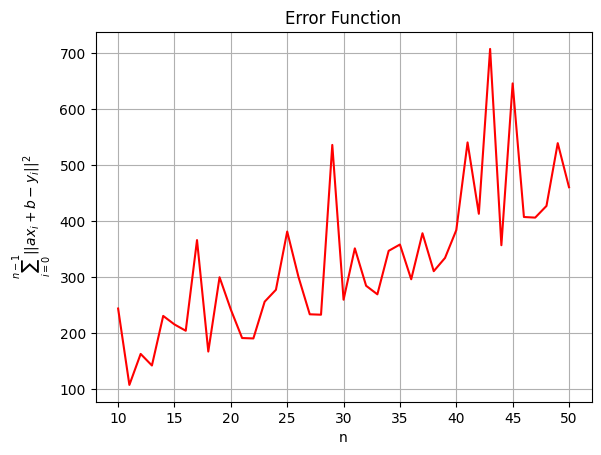

In [145]:
plt.plot(x_j,norm2_er,'r-')
plt.grid()
plt.xlabel('n')
plt.ylabel('$\sum_{i=0}^{n-1} ||ax_i + b - y_i||^2$')
plt.title('Error Function')

# Part5

In [146]:
n=20
x_i=np.linspace(0,5,n).round(2)
eps_i=np.random.normal(0,1,n).round(2)
y_i = x_i**2 + 2*x_i + 3 + eps_i

[0.   0.26 0.53 0.79 1.05 1.32 1.58 1.84 2.11 2.37 2.63 2.89 3.16 3.42
 3.68 3.95 4.21 4.47 4.74 5.  ]
[ 2.98    3.9676  4.8909  6.5841  6.9825  8.0024  7.3664  8.5156 11.8821
 12.4569 14.0269 15.9921 18.4256 22.1464 22.6824 25.5525 29.1941 30.1509
 36.8676 37.86  ]


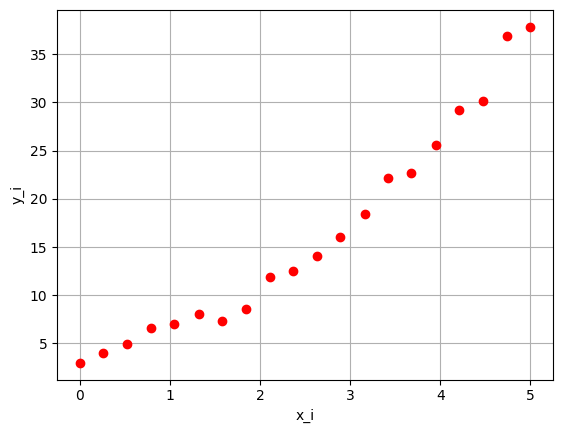

In [147]:
plt.plot(x_i,y_i,'ro')
plt.grid()
plt.xlabel('x_i')
plt.ylabel('y_i')
print(x_i)
print(y_i)

# Part6

In [148]:
W=np.array([1]*n).reshape(n,1)
W_1=np.concatenate([W,x_i.reshape(n,1)],axis=1)
x_qu=x_i**2
A=np.concatenate([W_1,x_qu.reshape(n,1)],axis=1)
B=(y_i.copy().T).reshape(n,1)

In [149]:
X_ls=(np.linalg.inv(A.T@A)@(A.T)@B).round(3)
a,b,c=X_ls

# Part7

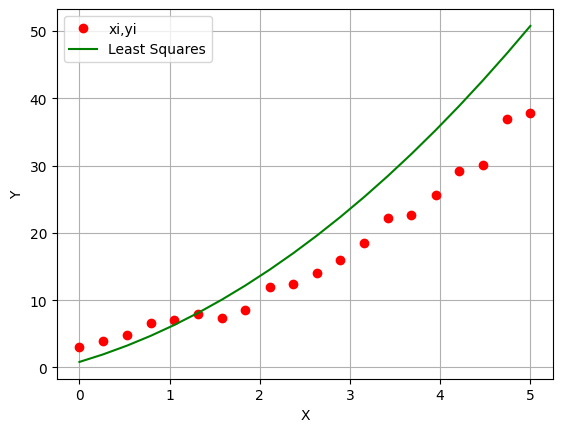

In [150]:
# plot
plt.plot(x_i,y_i,'ro')
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x_i, c*(x_i**2) + a*x_i + b ,color='green')
plt.legend(['xi,yi','Least Squares'])
# print('x_i=',x_i)
# print('y_i=',y_i)
# print('y_ls=',c*(x_i**2) + a*x_i + b)
# print(a,b,c)